# **PREDISKSI MENGGUNAKAN SIMPLE LINEAR REGRESSION DAN MULTIPLE LINEAR REGRESSION**

## **Import Library dan Load Data**

In [55]:
#Import library yang akan digunakan

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Dataset yang digunakan adalah: Project Data - Sheet1.csv

In [56]:
#Load dataset

data = pd.read_csv('Project Data - Sheet1.csv')
data

,Tips,Day of Week,Hours Worked,Shift Start Time,Shift End Time,Dollar/Hour
0,63,Mon,8,7,15,7.875000
1,58,Tue,8,7,15,7.250000
2,28,Wed,6,10,16,4.666667
3,32,Thu,6,10,16,5.333333
4,34,Fri,7,9,16,4.857143
5,30,Sat,7,9,16,4.285714
6,26,Sun,7,9,16,3.714286
7,69,Mon,8,7,15,8.625000
8,56,Tue,8,7,15,7.000000
9,25,Wed,6,10,16,4.166667


## **Data Understanding**

In [57]:
#Melihat nama kolom, jenis data, total missing value, persentase missing value, total unique value, dan sampel unique value dari setiap kolom:

summary = []
for column in data.columns:
    dtype = data[column].dtype
    null_count = data[column].isna().sum()
    null_percentage = round((null_count / len(data)) * 100, 2)
    n_unique = data[column].nunique()
    unique_samples = data[column].unique()[:2]
    
    summary.append({
        'dataFeature': column,
        'dataType': dtype,
        'null': null_count,
        'nullPct': null_percentage,
        'unique': n_unique,
        'uniqueSample': unique_samples
    })
summary_final = pd.DataFrame(summary)
summary_final

,dataFeature,dataType,null,nullPct,unique,uniqueSample
0,Tips,int64,0,0.0,28,"[63, 58]"
1,Day of Week,object,0,0.0,7,"[Mon, Tue]"
2,Hours Worked,int64,0,0.0,3,"[8, 6]"
3,Shift Start Time,int64,0,0.0,3,"[7, 10]"
4,Shift End Time,int64,0,0.0,2,"[15, 16]"
5,Dollar/Hour,float64,0,0.0,31,"[7.875, 7.25]"


Pada dataset ini tidak terdapat missing value.

## **Pemeriksaan Distribusi Data dan Outliers**

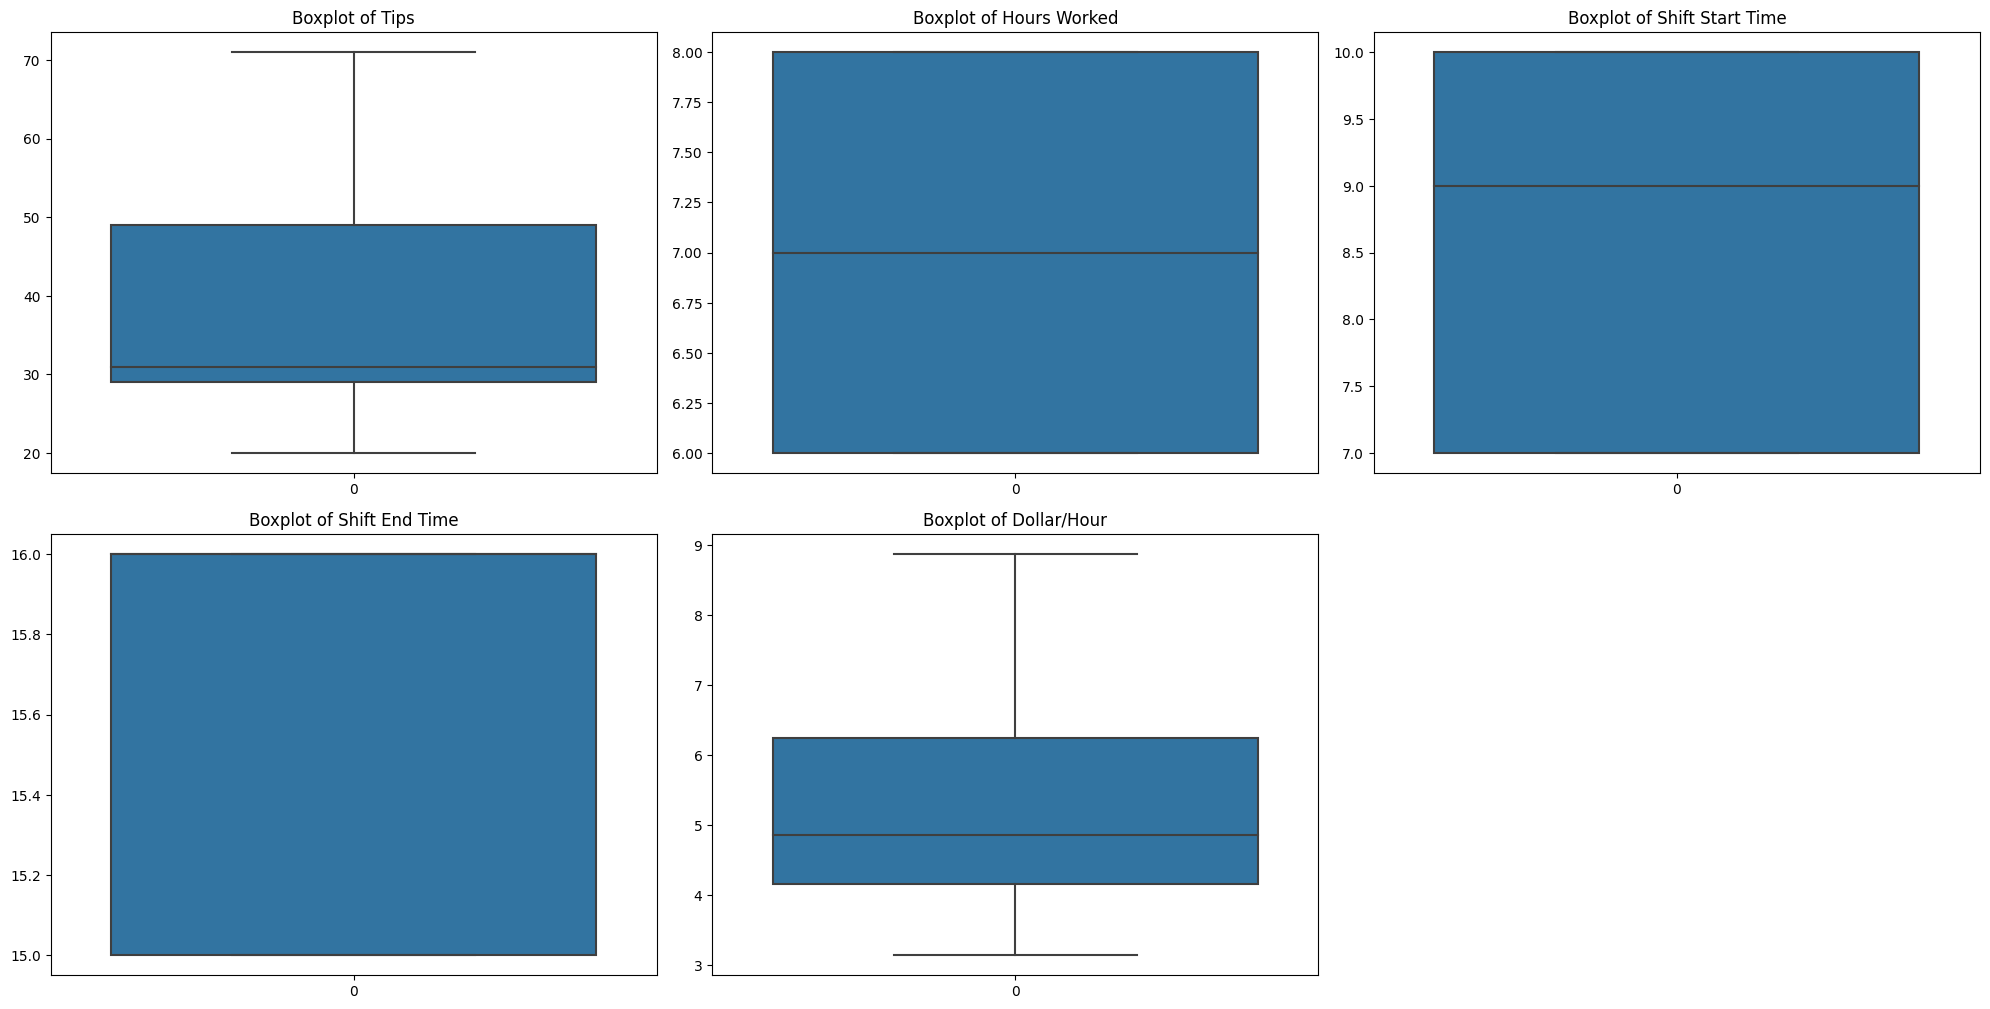

In [64]:
#Memilih kolom yang mengandung nilai numerik
feature_column = data[['Tips','Hours Worked','Shift Start Time','Shift End Time','Dollar/Hour']]

#Membuat kanvas grafik
plt.figure(figsize=(20,20))

#Code Utama
for i, column in enumerate(feature_column,1):
    plt.subplot(4,3,i)
    sns.boxplot(data= data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Dari lima boxplot di atas, dapat disimpulkan bahwa tidak terdapat outlier atau nilai ekstrem pada kolom-kolom numerik.

In [71]:
#import function uji normalitas
from scipy.stats import kstest

#List kosong untuk menaruh hasil uji distribusi setiap kolom
list = []

#Melakukan looping uji normalitas untuk setiap kolom yang sudah ditaruh dalam list feature_column
for i in feature_column : 
    ks,pvalue = kstest((data[i]), 'norm')
    if pvalue> 0.05:
        list.append([i,round(pvalue,2), ' berdistribusi normal'])
    else :
        list.append([i,round(pvalue,2), 'berdistribusi tidak normal'])

print('Jika p-value < 0,05 maka data berdistribusi tidak normal')
print('Jika p-value > 0,05 maka data berdistribusi normal')
print(f'\n')
print('Hasil Uji Normalitas')
pd.DataFrame(list, columns =[['Nama kolom','p-value','Distribusi']])

Jika p-value < 0,05 maka data berdistribusi tidak normal
Jika p-value > 0,05 maka data berdistribusi normal


Hasil Uji Normalitas


,Nama kolom,p-value,Distribusi
0,Tips,0.0,berdistribusi tidak normal
1,Hours Worked,0.0,berdistribusi tidak normal
2,Shift Start Time,0.0,berdistribusi tidak normal
3,Shift End Time,0.0,berdistribusi tidak normal
4,Dollar/Hour,0.0,berdistribusi tidak normal


Berdasarkan uji normalitas yang telah dilakukan menunjukkan bahwa data-data pada kolom 'Tips', 'Hours Worked', 'Shift Start Time', 'Shift End Time', dan 'Dollar/Hour' **berdistribusi tidak normal**

## **Eksplorasi Data**

### **Korelasi Setiap Variabel**

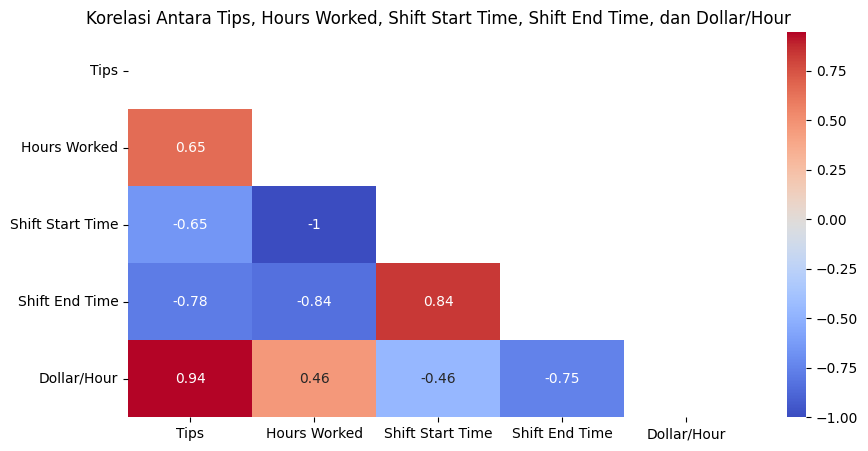

In [92]:
#Membuat korelasi setiap kolom numerik
feature_column_corr = feature_column.corr('spearman')

#Memfilter agar korelasi yang ditampilkan tidak duplikasi dan bukan korelasi terhadap masing-masing variabel
matrix = np.triu(feature_column_corr)

#Membuat canvas plot
plt.figure(figsize=(10,5))

#Code Utama
sns.heatmap(
    feature_column_corr, #Variable korelasi yang akan ditampilkan
    annot=True, #Menampilkan nilai korelasinya
    mask = matrix, #Agar menampilkan salah satu sisi korelasi saja dan tidak menampilkan korelasi dengan dirinya sendiri
    cmap = 'coolwarm' #Memilih warna
)
#Menambahkan judul
plt.title('Korelasi Antara Tips, Hours Worked, Shift Start Time, Shift End Time, dan Dollar/Hour')

#Menampilkan grafik
plt.show()

Berdasarkan heatmap di atas, setiap variabel memiliki korelasi yang kuat yaitu:
- Korelasi positif berkisar antara 0,46 hingga 0,94 
- Korelasi negatif berkisar antara -0,46 hingga -1

### **Find Maximum and Minimum of Tips and Working Hours for Every Working Days**

In [93]:
#Menampilkan tips terbesar setiap hari kerja
tips_max = data[['Tips','Day of Week']].groupby('Day of Week').max().reset_index()
#Mengganti nama kolom 'Tips' menjadi 'Maximum Tips'
tips_max.rename(columns={'Tips': 'Maximum Tips'}, inplace=True)

#Menampilkan tips terkecil setiap hari kerja
tips_min = data[['Tips','Day of Week']].groupby('Day of Week').min().reset_index()
#Mengganti nama kolom 'Tips' menjadi 'Minimum Tips'
tips_min.rename(columns={'Tips': 'Minimum Tips'}, inplace=True)

#Menampilkan working hours terbesar setiap hari kerja
work_hours_max = data[['Hours Worked','Day of Week']].groupby('Day of Week').max().reset_index()
#Mengganti nama kolom 'Hours Worked' menjadi 'Maximum Hours Worked'
work_hours_max.rename(columns={'Hours Worked': 'Maximum Hours Worked'}, inplace=True)

#Menampilkan working hours terkecil setiap hari kerja
work_hours_min = data[['Hours Worked','Day of Week']].groupby('Day of Week').min().reset_index()

#Mengganti nama kolom 'Hours Worked' menjadi 'Minimum Hours Worked'
work_hours_min.rename(columns={'Hours Worked': 'Minimum Hours Worked'}, inplace=True)

#Menggabungkan dataframe tips_max dengan tips_min menggunakan penghubung kolom 'Day of Week'
day_performance = pd.merge(tips_max, tips_min, on='Day of Week')
#Menggabungkan dataframe day_performance dengan work_hours_max menggunakan penghubung kolom 'Day of Week'
day_performance = pd.merge(day_performance, work_hours_max, on='Day of Week')
#Menggabungkan dataframe day_performance dengan work_hours_min menggunakan penghubung kolom 'Day of Week'
day_performance = pd.merge(day_performance, work_hours_min, on='Day of Week')

#Menampilkan dataframe yang sudah digabungkan seluruhnya
day_performance

,Day of Week,Maximum Tips,Minimum Tips,Maximum Hours Worked,Minimum Hours Worked
0,Fri,35,23,7,7
1,Mon,71,40,8,8
2,Sat,37,26,7,7
3,Sun,34,22,7,7
4,Thu,35,20,6,6
5,Tue,62,50,8,8
6,Wed,38,25,6,6


Dari tabel di atas dapat disimpulkan bahwa:
- Tips terbesar diperoleh pada hari senin
- Tips terkecil diperoleh pada hari kamis
- Working hours terbesar adalah 8 jam yang berada di hari senin dan selasa
- Working hours terkecil adalah 6 jam yang berada di hari rabu dan kamis

## **Regression Model**

### **Simple Regression Model**

Pada simple regression model akan melihat pengaruh working hours terhadap tips yang diperoleh.

In [94]:
#Code utama untuk simple regression model

reg_model = sm.OLS(data['Tips'],sm.add_constant(data[['Hours Worked']]))
hasil = reg_model.fit()
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:                   Tips   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     67.65
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.18e-10
Time:                        18:51:35   Log-Likelihood:                -178.05
No. Observations:                  49   AIC:                             360.1
Df Residuals:                      47   BIC:                             363.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -63.7908     12.442     -5.127   

Berdasarkan summary di atas, diperoleh hal-hal sebagai berikut:
- Working hours mempengaruhi sebesar 59% terhadap tips yang diperoleh
- Hipotesisnya adalah:
    
    -H0 = beta tidak mempengaruhi secara signifikan terhadap model (beta = 0)
    
    -H1 = beta mempengaruhi secara signifikan terhadap model (beta != 0)
    
    Pada hasil di atas menunjukkan bahwa H0 tidak terpenuhi karena Prob (F-statistic) < 0,05 maka beta mempengaruhi secara signifikan.
- Model regresi yang diperoleh adalah Y = -63.7908 + (14.5357*x)

In [40]:
#Prediksi tips berdasarkan simple regression model

x = int(input(('Total jam kerja: ')))
def model (x):
    Y = -63.7908 + (14.5357*x)
    return Y

print (f'Tips yang akan diperoleh dari jam kerja {x} adalah {model(x)}')

Tips yang akan diperoleh dari jam kerja 10 adalah 81.56620000000001


### **Multiple Regression Model**

Pada multiple regression model akan melihat pengaruh working hours dan tips yang diperoleh per jam terhadap tips yang diperoleh.

In [42]:
#Code utama untuk multiple regression model

reg_model = sm.OLS(data['Tips'],sm.add_constant(data[['Hours Worked','Dollar/Hour']]))
hasil = reg_model.fit()
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:                   Tips   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     9748.
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           3.56e-61
Time:                        13:25:29   Log-Likelihood:                -51.629
No. Observations:                  49   AIC:                             109.3
Df Residuals:                      46   BIC:                             114.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -40.9150      0.987    -41.458   

Berdasarkan summary di atas, diperoleh hal-hal sebagai berikut:
- Working hours dan tips yang diperoleh per jam mempengaruhi sebesar 99,8% terhadap tips yang diperoleh
- Hipotesisnya adalah:
    
    -H0 = beta tidak mempengaruhi secara signifikan terhadap model (beta = 0)
    
    -H1 = beta mempengaruhi secara signifikan terhadap model (beta != 0)
    
    Pada hasil di atas menunjukkan bahwa H0 tidak terpenuhi karena Prob (F-statistic) < 0,05 maka beta mempengaruhi secara signifikan.
- Model regresi yang diperoleh adalah Y = -40.9150 + (5.5817*x1) + (7.4746*x2)

In [45]:
#Prediksi tips berdasarkan multiple regression model

x1 = int(input('Total jam kerja: '))
x2 = float(input('Masukkan dollar/hours: '))
def model (x1,x2):
    Y = -40.9150 + (5.5817*x1) + (7.4746*x2)
    return Y

print (f'Tips yang akan diperoleh dari jam kerja {x1} dan dollar/hours {x2} adalah {model(x1,x2)}')

Tips yang akan diperoleh dari jam kerja 8 dan dollar/hours 4.5 adalah 37.3743
